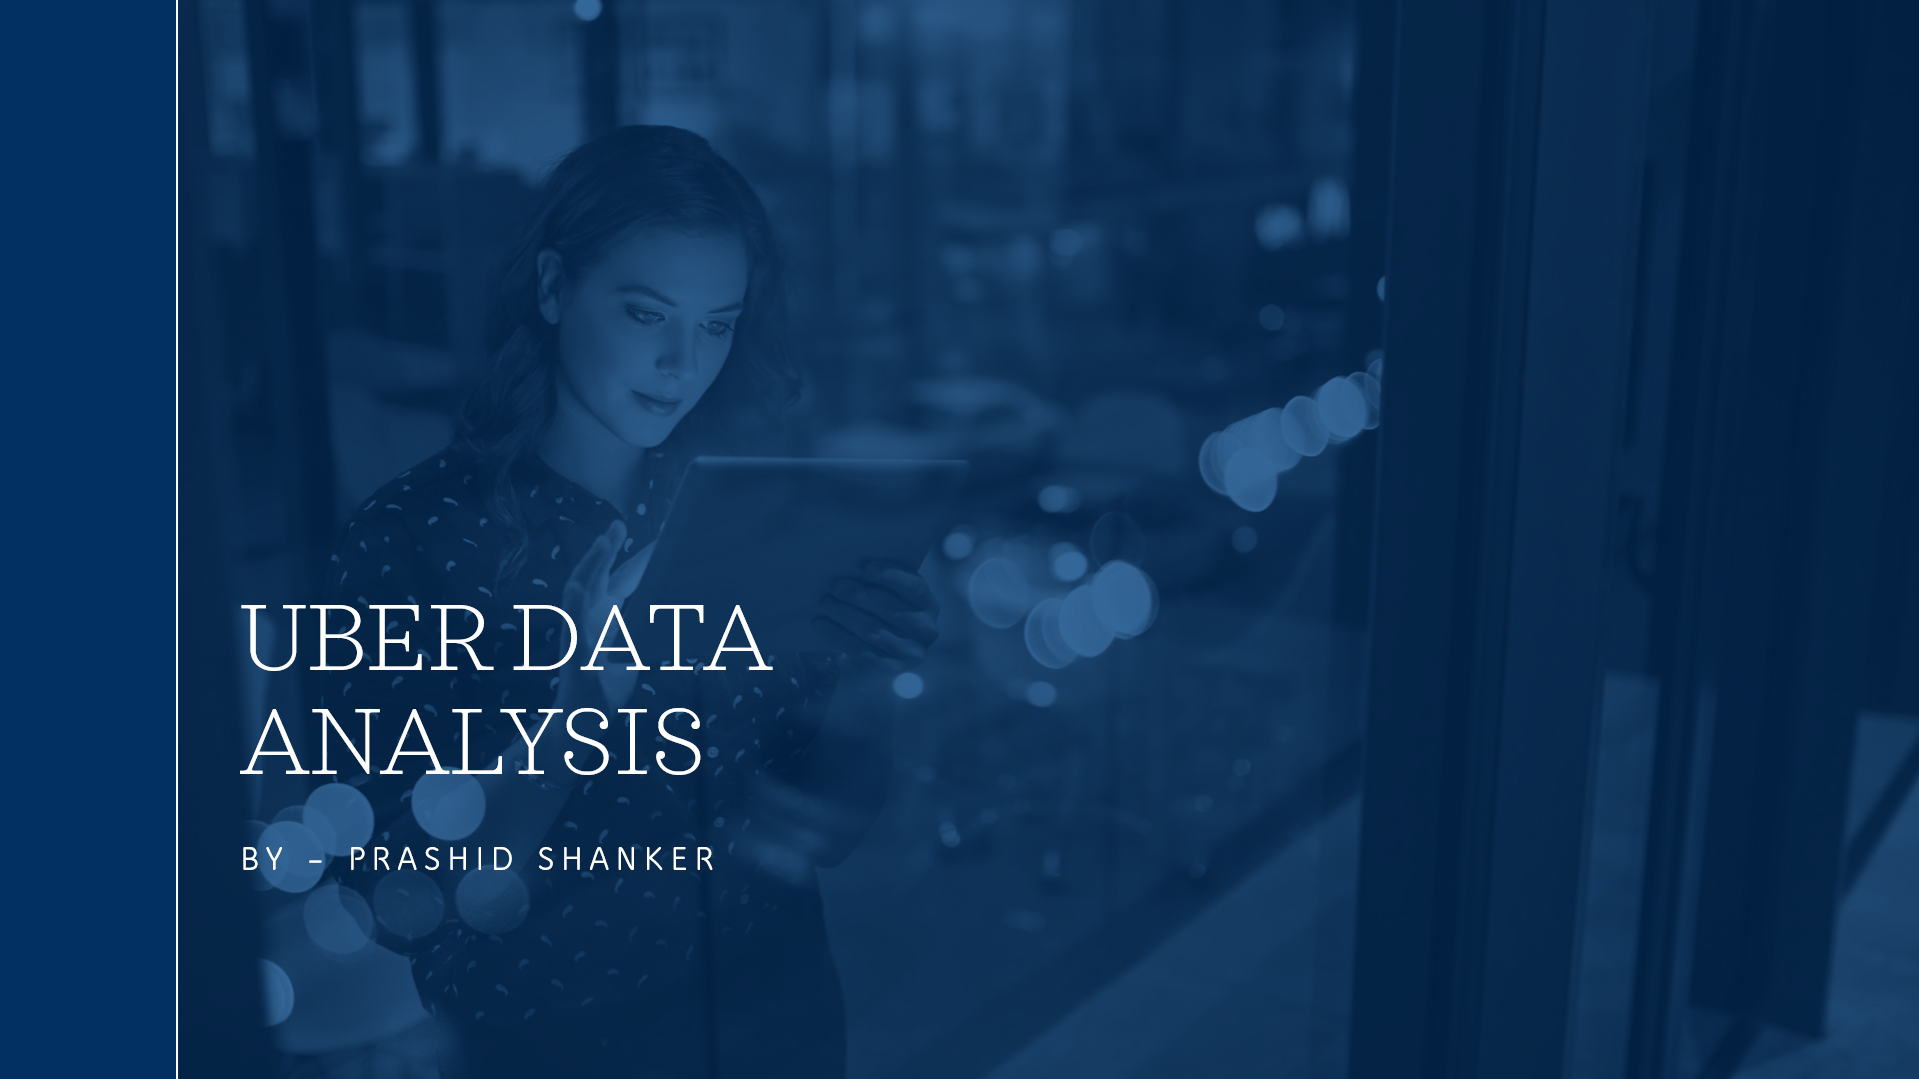

# UBER DATA ANALYSIS

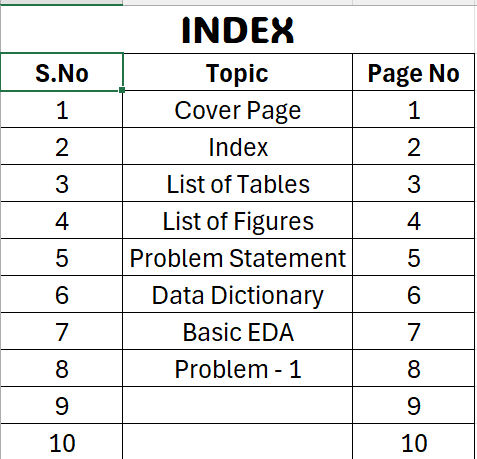

# List of Tables


# List of Figures

## Problem Statement / Objective

With the increasing popularity of ride-hailing services like Uber, understanding the factors influencing ride demand is crucial for optimizing operations and enhancing customer satisfaction. This project focuses on analyzing Uber pickup data in New York City to uncover patterns and correlations between ride demand and various factors such as time of day, day of the week, weather conditions, and seasonal trends. The goal is to provide actionable insights that can help Uber improve service efficiency, optimize driver availability, and enhance the overall customer experience.

## Data Description

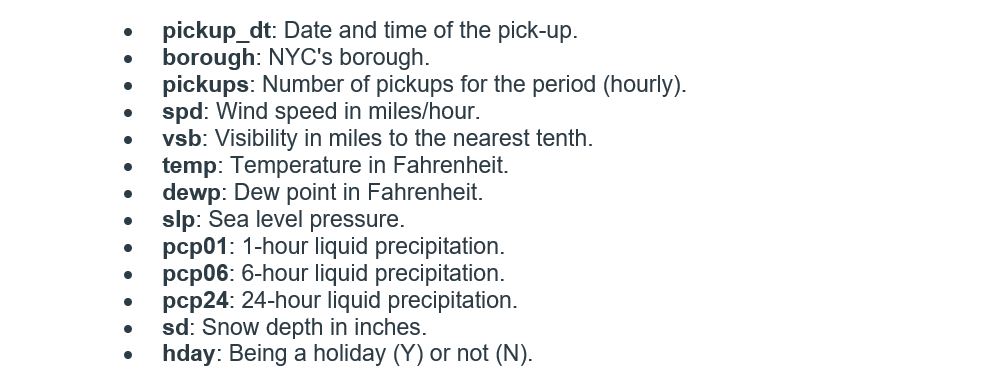

## Basic Steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('3-Uber_Data_New.csv')

### Display the top 5 rows

In [3]:
data.head().T

,0,1,2,3,4
pickup_dt,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00
borough,Bronx,Brooklyn,EWR,Manhattan,Queens
pickups,152.0,1519.0,0.0,5258.0,405.0
spd,5.0,5.0,5.0,5.0,5.0
vsb,10.0,10.0,10.0,10.0,10.0
temp,30.0,NaN,30.0,30.0,30.0
dewp,7.0,7.0,7.0,7.0,7.0
slp,1023.5,1023.5,1023.5,1023.5,1023.5
pcp01,0.0,0.0,0.0,0.0,0.0
pcp06,0.0,0.0,0.0,0.0,0.0


### Observation
**In the column hday there is a '?' which seems to be a wrong entry which is needed to be corrected**

### Display the last 5 rows

In [4]:
data.tail().T

,29096,29097,29098,29099,29100
pickup_dt,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00
borough,EWR,Manhattan,Queens,Staten Island,NaN
pickups,0.0,3828.0,580.0,0.0,3.0
spd,7.0,7.0,7.0,7.0,7.0
vsb,10.0,10.0,10.0,10.0,10.0
temp,75.0,75.0,75.0,75.0,75.0
dewp,65.0,65.0,65.0,65.0,65.0
slp,1011.8,1011.8,1011.8,1011.8,1011.8
pcp01,0.0,0.0,0.0,0.0,0.0
pcp06,0.0,0.0,0.0,0.0,0.0


### Check the shape of dataset

In [5]:
data.shape

(29101, 13)

### Check the datatypes of each feature

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


In [8]:
#data['pickup_dt','pickup_dt', 'borough', 'pickups', 'spd','vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'].dtypes

### Check the Statistical summary 

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29099.0,490.236022,995.680628,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900262,19.800541,0.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1052.633123,5945.147362,1.0,1012.5,1018.2,1022.900000,1015200.00
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


### Check the null value

In [8]:
data.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [9]:
data.isnull().sum().sum()


3404

In [10]:
data['temp'].head(10)

0    30.0
1     NaN
2    30.0
3    30.0
4    30.0
5    30.0
6    30.0
7    30.0
8     NaN
9    30.0
Name: temp, dtype: float64

In [11]:
data['borough'].head(10)

0            Bronx
1         Brooklyn
2              EWR
3        Manhattan
4           Queens
5    Staten Island
6              NaN
7            Bronx
8         Brooklyn
9              EWR
Name: borough, dtype: object

### Check the duplicate values

In [12]:
data.duplicated().sum()


0

### Check the outliers and their authenticity

<Axes: xlabel='dewp'>

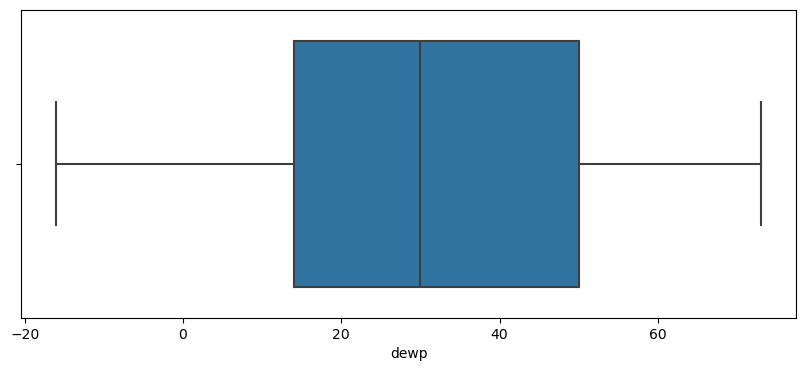

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'dewp')

<Axes: xlabel='slp'>

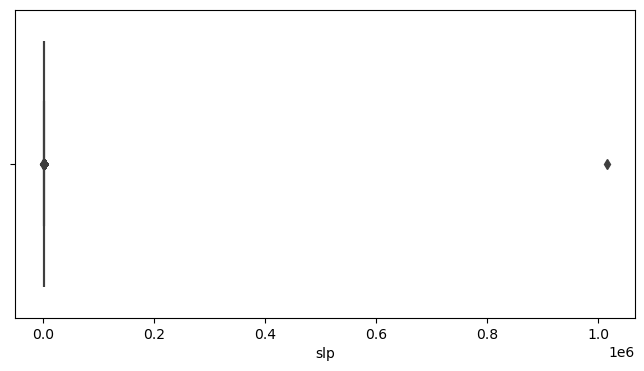

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'slp')

<Axes: xlabel='pickups'>

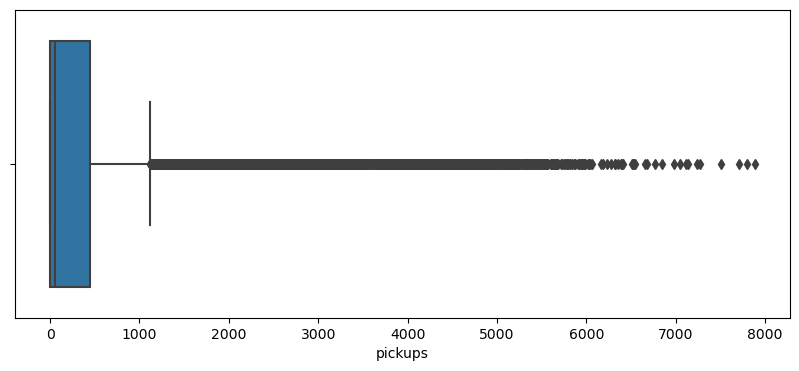

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pickups')

<Axes: xlabel='temp'>

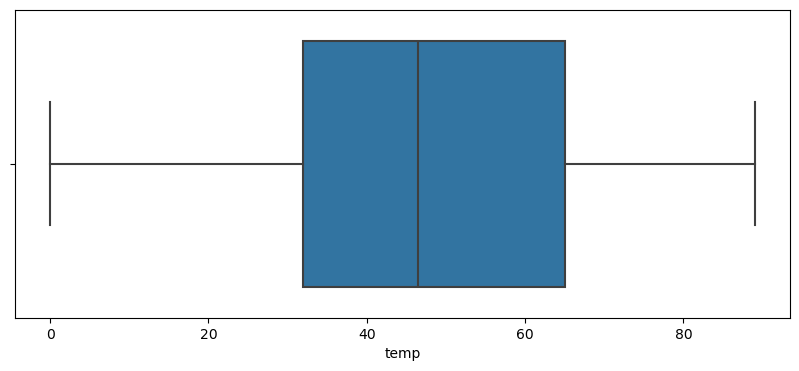

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'temp')

<Axes: xlabel='spd'>

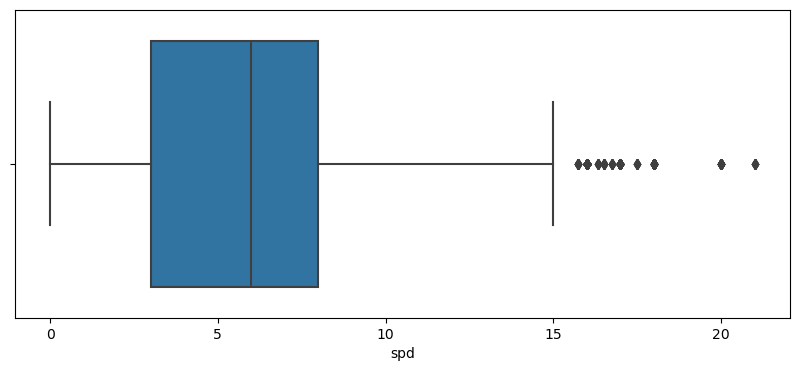

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'spd')

<Axes: xlabel='vsb'>

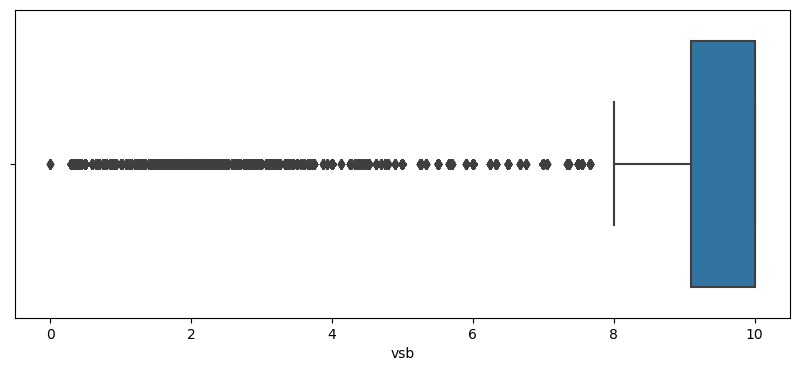

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'vsb')

<Axes: xlabel='pcp01'>

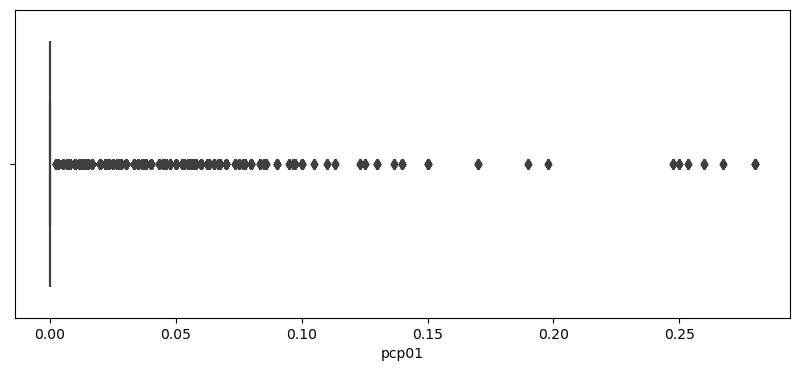

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp01')

<Axes: xlabel='pcp06'>

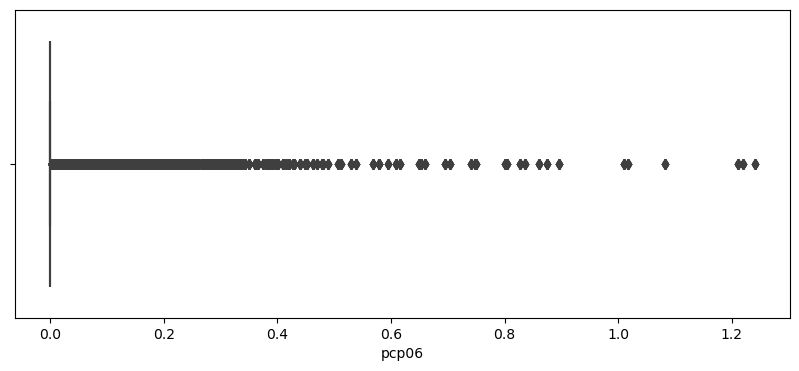

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp06')

<Axes: xlabel='pcp24'>

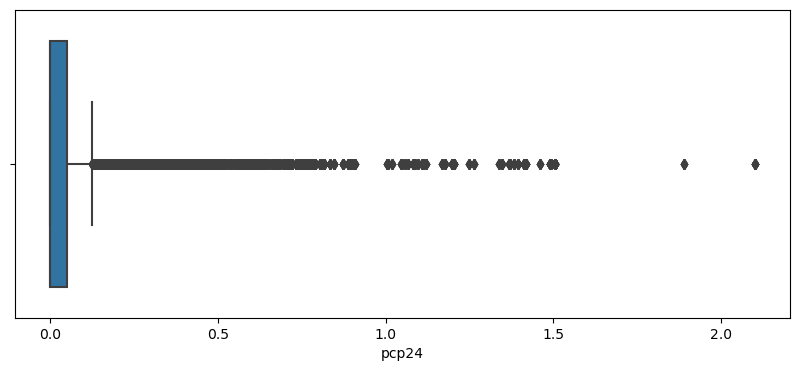

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp24')

<Axes: xlabel='sd'>

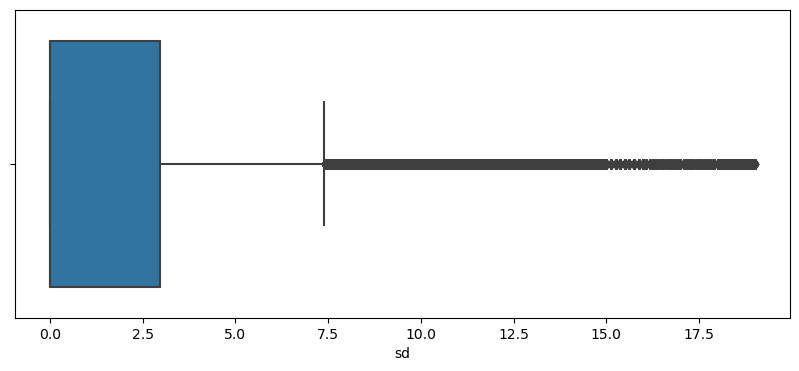

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'sd')

### Check the anomalies or wrong entries.

In [23]:
data['hday'].value_counts()

hday
N    27980
Y     1119
?        2
Name: count, dtype: int64

In [24]:
data[data['hday']=='?']

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
123,1/1/2015 19:00,Queens,238.0,7.0,10.0,37.0,7.0,1016.2,0.0,0.0,0.0,0.0,?


In [25]:
data['hday'] = data['hday'].replace('?', np.nan)

In [26]:
mean1=data['temp'].mean()
data['temp'].replace(np.nan,median1,inplace=True)

NameError: name 'median1' is not defined

In [ ]:
data['temp'].isnull().sum()

In [ ]:
mode1=data['borough'].mode().values[0]
data['borough']=data['borough'].replace(np.nan,mode1)

In [ ]:
data['borough'].isnull().sum()

In [ ]:
data.isnull().sum()

In [ ]:
median1=data['pickups'].median()
data['pickups'].replace(np.nan,median1,inplace=True)
data['pickups'].isnull().sum()

In [ ]:
mode2=data['hday'].mode().values[0]
data['hday']=data['hday'].replace(np.nan,mode1)
data['hday'].isnull().sum()

In [ ]:
data.isnull().sum()

In [ ]:
def remove_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lwr_range=q1-(1.5 * iqr)
    upr_range=q3+(1.5 * iqr)
    return lwr_range, upr_range

In [ ]:
for i in data.columns:
    if data[i].dtype != 'object':
        lr,ur = remove_outliers(data[i])
        data[i]=np.where(data[i]>ur, ur,data[i])
        data[i]=np.where(data[i]<lr,lr,data[i])

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp24')

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'slp')

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp06')

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'temp')

# 1. Pickup Analysis

### What is the total number of Uber pickups across all boroughs?

In [ ]:
total_pickups = data['pickups'].sum()

In [ ]:
total_pickups

### Which borough has the highest average number of hourly pickups?

In [28]:
avg_pickups_borough = data.groupby('borough')['pickups'].mean().idxmax()

In [29]:
avg_pickups_borough

'Manhattan'

### How do the number of pickups vary across different hours of the day?